In [1]:
initial_dna_sequence = list("A9B6C9D6E9F6G9H6I9J6K")
forward_9_positions=[1,5,9,13,17]#computer positions
    
backward_6_positions=[3,7,11,15,19]#computer positions

In [2]:
def prime(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        if inverse_composite[i]=='6':
            inverse_composite[i]='9'
        elif inverse_composite[i]=='9':
            inverse_composite[i]='6'
        elif inverse_composite[i].islower():
            inverse_composite[i]=inverse_composite[i].upper()
        elif inverse_composite[i].isupper():
            inverse_composite[i]=inverse_composite[i].lower()
        else:
            raise SyntaxError
    return inverse_composite

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+prime(DNA[site_1-1:site_2])+DNA[site_2:] 

import random

def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
    
    # Determine which function to use
    #Not yet complete,must know if <> is a flip
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        else :
            return 'DoNotCount'

In [3]:
def probability_calculation(DNA):
    # Dictionary to store counts of each outcome
    outcome_counts = {}
    outcome_list=[[DNA],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    recombinases_event=  0
    # Run simulations
    for _ in outcome_list:
        if recombinases_event<len(outcome_list)-2:
            recombinases_event+=1      
        for stored_result in _:
            
            forward_9_positions=detect_forward_sites(stored_result,['9'])
            backward_6_positions=detect_backward_sites(stored_result,['6'])
            # Randomly select two sites
            combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
            if len(combined)>=2:
            
                for i in range(len(combined)):
                    for j in range(len(combined)):
                        choice1,choice2 = combined[i], combined[j]

                
                        output = evaluate_colour_CRE(stored_result,choice1,choice2)
                        if output!='DoNotCount':
                            formatted_output = "".join(output)
                            #print(formatted_output)  
                            if formatted_output not in outcome_counts:
                                outcome_counts[formatted_output] = 1
                                
                                outcome_list[recombinases_event].append(output)
                            outcome_counts[formatted_output] += 1
        print(len(outcome_list[recombinases_event]))
    total_simulations=0
    for i in outcome_list:
        for j in i:
            total_simulations+=1    
    # Calculate probabilities
    probabilities = {outcome: count / total_simulations 
                     for outcome, count in outcome_counts.items()}
    
    return probabilities, outcome_list

In [4]:
data={}

probabilities,outcome_lists= probability_calculation(initial_dna_sequence)


46
630
5992
39081
159101
406410
612423
494543
148416
248
0
0
0
0
0
0
0


In [5]:

stored_data=(probabilities,outcome_lists)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plotting(x,y):
    # Extract keys (x-axis) and values (y-axis)
    x = x
    y = np.log10(y)

    # Create a bar plot (or line plot)
    plt.plot(x, y)  # For a bar chart
    # plt.plot(x, y, marker='o')  # For a line plot with markers

    # Add labels and title
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title('Dictionary Plot')

    # Show the plot
    plt.show()

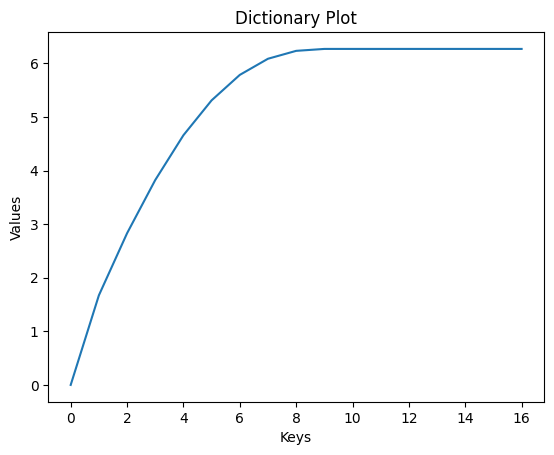

In [7]:
x=[]
y=[]
for i in range(len(outcome_lists)):
    x.append(i)
    if i==0:
        y.append(len(outcome_lists[i]))
    elif i >0:
        y.append(y[i-1]+len(outcome_lists[i]))
plotting(x,y)

C:\Users\Thoma\AppData\Local\Temp\ipykernel_96528\1355534565.py:7: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)


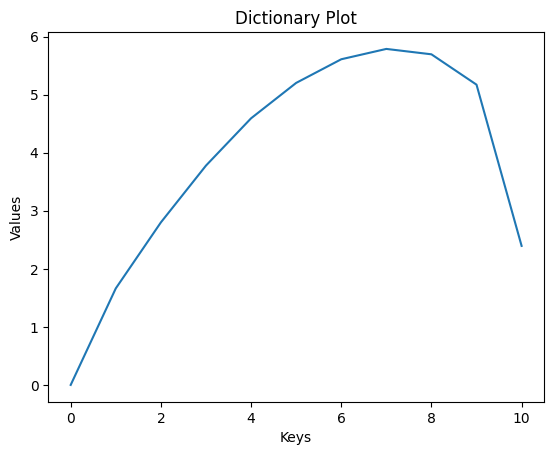

In [8]:
x=[]
y=[]
for i in range(len(outcome_lists)):
    x.append(i)
    if i==0:
        y.append(len(outcome_lists[i]))
    elif i >0:
        y.append(len(outcome_lists[i]))
plotting(x,y)